In [1]:
# Import Numpy and Matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

# To Choose Random Lines for Visualization
import random

# For Clustering
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster

# For Reading CSV Files
import csv

import statistics

import math

from scipy.stats import pearsonr

import time

from pathlib import Path
from numpy import genfromtxt
from csv import writer

from math import isclose

from scipy import optimize

In [2]:
# Read the Data Cube
noon_cube = np.load('data_cube_v2.0.0.npy',allow_pickle='TRUE').item()

In [3]:
# Organize and Make Datetimes Readable
datetimes = []
for x in noon_cube:
    x = x.replace('Time ', '')
    datetimes.append(x)
datetimes.sort()

In [4]:
# Universal Graph Styling
COLOR = 'k'
plt.style.use(['ggplot'])
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
# Further Organize and Make Datetimes Readable
import datetime
formatted_dates = []
datetimes.remove('20210509T195226')
np_datetimes = np.array(datetimes)
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

In [34]:
# Generate Five Random Lines to get Depth over Time
dl_1,dl_2,dl_3,dl_4,dl_5 = [],[],[],[],[]
for x in range(5):
    random_file = random.choice(list(noon_cube))
    random_order = random.choice(list(noon_cube[random_file]))
    random_line = random.choice(list(noon_cube[random_file][random_order]))
    
    for datetime in datetimes:
        datetime = 'Time '+datetime
        try:
            depth = noon_cube[datetime][random_order][random_line]['skew']
            centroid = noon_cube[datetime][random_order][random_line]['centroid']
        except KeyError:
            depth = 0
            centroid = 0
        
        if x == 0:
            dl_1.append((depth, centroid)) 
        if x == 1:
            dl_2.append((depth, centroid)) 
        if x == 2:
            dl_3.append((depth, centroid)) 
        if x == 3:
            dl_4.append((depth, centroid)) 
        if x == 4:
            dl_5.append((depth, centroid)) 

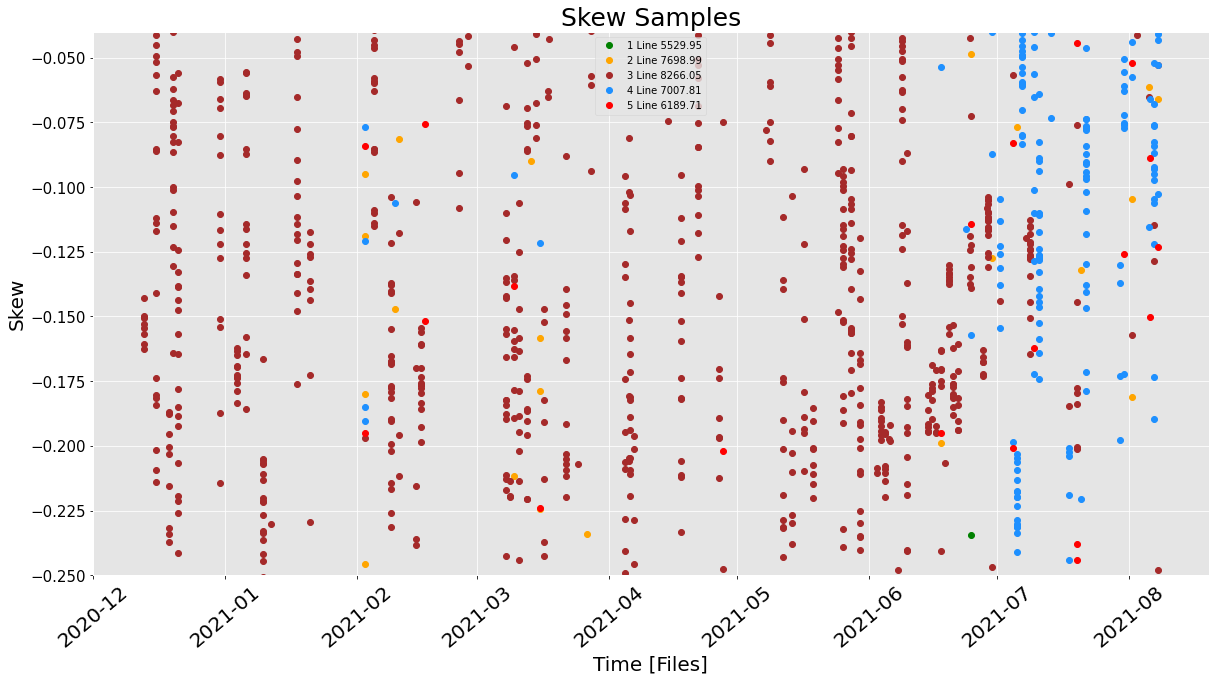

In [35]:
# Organize and Make Datetimes Readable
import datetime
formatted_dates = []
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

# Prepare Lists of Depths
dl_1depths = list(zip(*dl_1))[0]
dl_2depths = list(zip(*dl_2))[0]
dl_3depths = list(zip(*dl_3))[0]
dl_4depths = list(zip(*dl_4))[0]
dl_5depths = list(zip(*dl_5))[0]

# Fit a Polynomial to each Line
fit1 = np.polyfit(dates, dl_1depths, 2)
yp1 = np.polyval(fit1, dates)
fit2 = np.polyfit(dates, dl_2depths, 2)
yp2 = np.polyval(fit2, dates)
fit3 = np.polyfit(dates, dl_3depths, 2)
yp3 = np.polyval(fit3, dates)
fit4 = np.polyfit(dates, dl_4depths, 2)
yp4 = np.polyval(fit4, dates)
fit5 = np.polyfit(dates, dl_5depths, 2)
yp5 = np.polyval(fit5, dates)

# Plot the Depths over Time
plt.figure(figsize=(20,10))
plt.plot_date(dates, dl_1depths, color='green', label='1 Line '+str(round(dl_1[1][1], 2)))
plt.plot_date(dates, dl_2depths, color='orange', label='2 Line '+str(round(dl_2[1][1], 2)))
plt.plot_date(dates, dl_3depths, color='brown', label='3 Line '+str(round(dl_3[1][1], 2)))
plt.plot_date(dates, dl_4depths, color='dodgerblue', label='4 Line '+str(round(dl_4[1][1], 2)))
plt.plot_date(dates, dl_5depths, color='red', label='5 Line '+str(round(dl_5[1][1], 2)))
#plt.plot(dates, yp1, color='#000')
#plt.plot(dates, yp2, color='#000')
#plt.plot(dates, yp3, color='#000')
#plt.plot(dates, yp4, color='#000')
#plt.plot(dates, yp5, color='#000')
plt.title('Skew Samples', fontsize=25)
plt.xlabel('Time [Files]', fontsize=20)
plt.ylabel('Skew', fontsize=20)
#plt.ylim(-0.25,-0.04)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize=15)
plt.legend()

In [8]:
# Get the 'a' value in (ax^2 + bx + c) for each polynomial fit
# value > 1 are of interest
a, b, c, d, e = fit1[0], fit2[0], fit3[0], fit4[0], fit5[0]
print(1, a, np.var(dl_1depths)*1000000)
print(2, b, np.var(dl_2depths)*1000000)
print(3, c, np.var(dl_3depths)*1000000)
print(4, d, np.var(dl_4depths)*1000000)
print(5, e, np.var(dl_5depths)*1000000)

1 2.3646665115950885e-05 12691.199394398243
2 1.0158186274741439e-05 7961.71068181363
3 2.1355641284869084e-05 13172.31378477803
4 -4.632454792085456e-05 43455.23558277792
5 1.0158186274741439e-05 7961.71068181363


In [10]:
# Remove Telluric Contamination
orders = list(range(40,111))
for order in orders:
    for line in list(noon_cube['Time 20210509T195226']['Order '+str(order)]):
        ref_centroid = noon_cube['Time 20210509T195226']['Order '+str(order)][line]['centroid']                                                                                                                                                                           
        
        if (5870 <= ref_centroid <= 6000) or (6270 <= ref_centroid <= 6340) or (6450 <= ref_centroid <= 6610) or (6860 <= ref_centroid <= 7410) or (7590 <= ref_centroid <= 7750) or (7850 <= ref_centroid <= 9900):
            for datetime in noon_cube:
                noon_cube[datetime]['Order '+str(order)][line]

In [11]:
# Collect Depth and Centroid values for Plot
big_list = []
datetime = '20210509T195226'
for order in noon_cube['Time '+str(datetime)]:
    for line in noon_cube['Time '+str(datetime)][str(order)]:
        depth = noon_cube['Time '+str(datetime)][str(order)][str(line)]['amplitude']
        if depth>=1:
            continue
        centroid = noon_cube['Time '+str(datetime)][str(order)][str(line)]['centroid']
        big_list.append((depth, centroid, datetime))

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

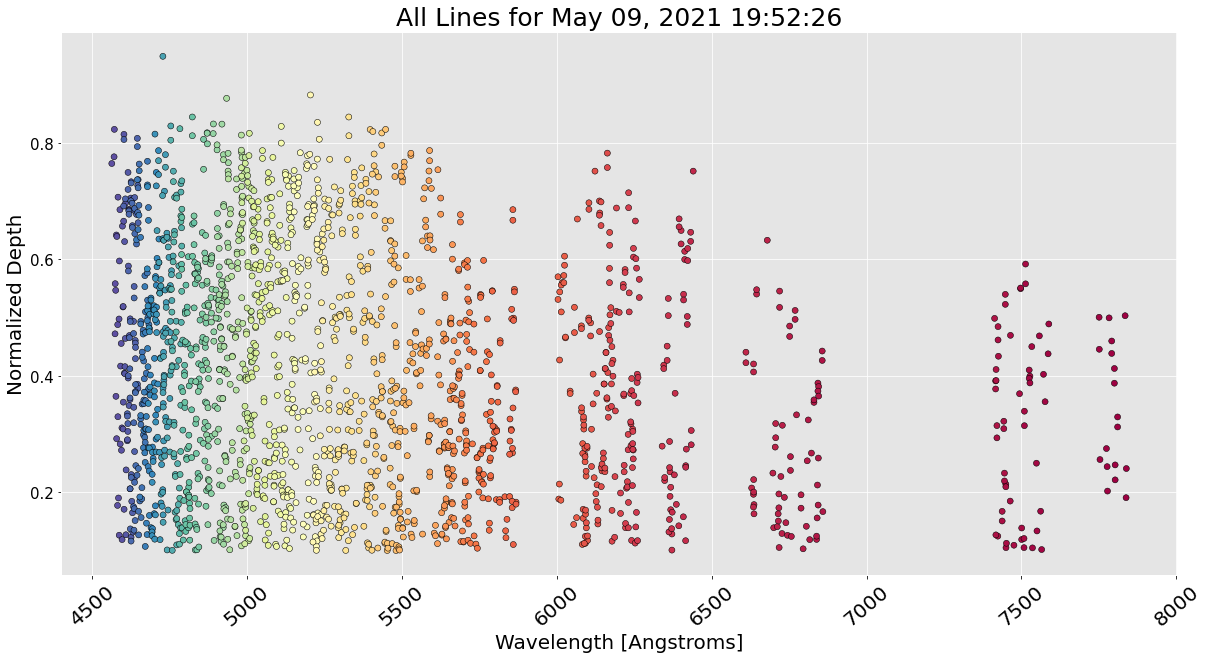

In [12]:
# Plot Depths against Centroids for Single Time (Feb 08, 2021 16:42:19)
big_list_depths = list(zip(*big_list))[0]
big_list_centroids = list(zip(*big_list))[1]
big_list_datetimes = list(zip(*big_list))[2]

plt.figure(figsize=(20,10))
cm = plt.cm.get_cmap('Spectral_r')
z = range(np.shape(big_list_centroids)[0])
plt.scatter(big_list_centroids, big_list_depths, c=z, cmap=cm, edgecolors='black')
plt.title('All Lines for May 09, 2021 19:52:26', fontsize=25)
plt.xlabel('Wavelength [Angstroms]', fontsize=20)
plt.ylabel('Normalized Depth', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize= 15)

In [23]:
# Prepare Nested Dictionary for Pandas
nested_dict = {}
count = 0
for time in noon_cube:
    
    # Organize and Make Datetimes Readable
    import datetime
    x = time.replace('Time ', '')
    d = datetime.datetime.strptime(x, '%Y%m%dT%H%M%S')
    save_date = mdates.date2num(d)
    
    for order in noon_cube[time]:
        for line in noon_cube[time][order]:
            nested_dict[count] = {}
            nested_dict[count]['Centroid'] = noon_cube[time][order][line]['centroid']
            nested_dict[count]['Centroid_Pix'] = noon_cube[time][order][line]['centroid_pixval']
            nested_dict[count]['Depth'] = noon_cube[time][order][line]['amplitude']
            nested_dict[count]['Sigma'] = noon_cube[time][order][line]['sigma']
            nested_dict[count]['Skew'] = noon_cube[time][order][line]['skew']
            nested_dict[count]['Time'] = save_date

            count += 1

In [32]:
# Create Readable Dataframe for single Time (Feb 08 2021 16:42:19)
main_df = pd.DataFrame.from_dict(nested_dict,orient='index')
main_df.sort_values(by=['Centroid'])
main_df

,Centroid,Centroid_Pix,Depth,Sigma,Skew,Time
0,4565.043249,54.499695,0.764860,5.5,-0.210341,18756.828079
1,4572.387794,652.999731,0.776418,5.0,-0.308348,18756.828079
2,4573.267681,725.999622,0.823507,6.0,-0.393940,18756.828079
3,4575.511815,913.499864,0.472341,3.5,-0.383113,18756.828079
4,4576.011373,955.499864,0.558476,3.5,-0.264730,18756.828079
...,...,...,...,...,...,...
5156650,7802.162304,911.499779,0.226600,4.5,0.385160,18697.814479
5156651,7810.075416,1306.999813,0.313419,4.0,0.796206,18697.814479
5156652,7834.372952,2579.999705,0.503379,5.0,0.194427,18697.814479
5156653,7837.483678,2749.999703,0.191824,5.0,0.235531,18697.814479


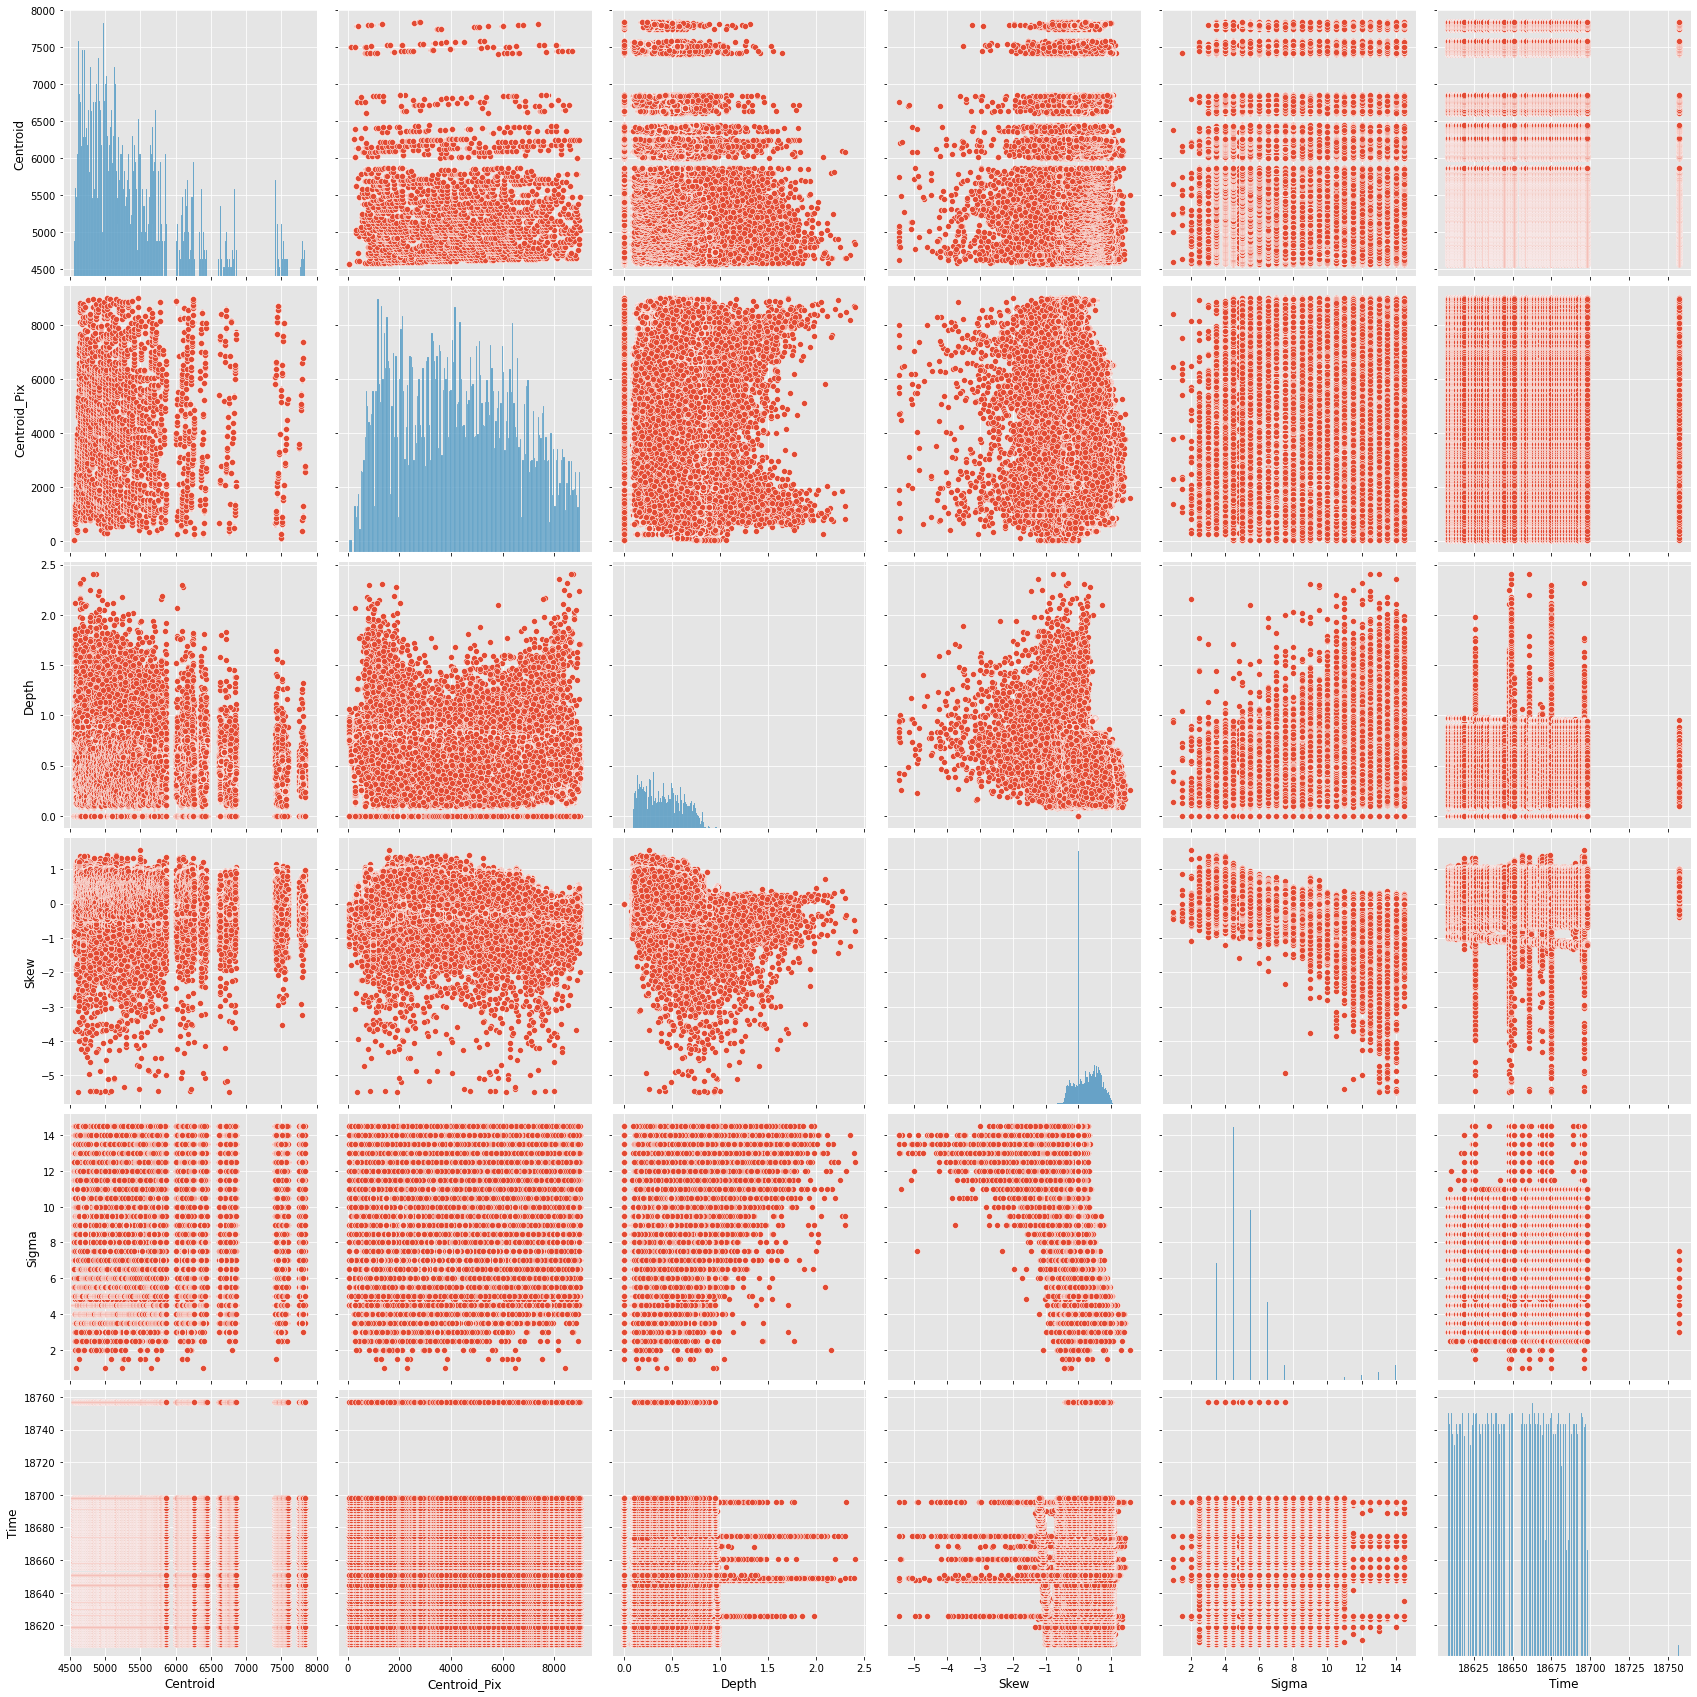

In [33]:
# Pair Plots for Different Parameters
sns.pairplot(main_df[['Centroid', 'Centroid_Pix', 'Depth', 'Skew', 'Sigma', 'Time']], height=4)

In [16]:
# Generate 10 Random Lines to get Depth over Time for Clustering Attempt
dl_1,dl_2,dl_3,dl_4,dl_5,dl_6,dl_7,dl_8,dl_9,dl_10 = [],[],[],[],[],[],[],[],[],[]
for x in range(10):
    random_file = random.choice(list(noon_cube))
    
    orders = list(range(40,111))
    for order in orders:
        if not list(noon_cube[random_file]['Order '+str(order)]):
            del noon_cube[random_file]['Order '+str(order)]
    
    random_order = random.choice(list(noon_cube[random_file]))
    random_line = random.choice(list(noon_cube[random_file][random_order]))
    
    for datetime in datetimes:
        datetime = 'Time '+datetime
        try:
            depth = noon_cube[datetime][random_order][random_line]['amplitude']
            centroid = noon_cube[datetime][random_order][random_line]['centroid']
        except KeyError:
            depth = 0
            centroid = 0
        
        if x == 0:
            dl_1.append((depth, centroid)) 
        if x == 1:
            dl_2.append((depth, centroid)) 
        if x == 2:
            dl_3.append((depth, centroid)) 
        if x == 3:
            dl_4.append((depth, centroid)) 
        if x == 4:
            dl_5.append((depth, centroid)) 
        if x == 5:
            dl_6.append((depth, centroid)) 
        if x == 6:
            dl_7.append((depth, centroid)) 
        if x == 7:
            dl_8.append((depth, centroid)) 
        if x == 8:
            dl_9.append((depth, centroid)) 
        if x == 9:
            dl_10.append((depth, centroid)) 

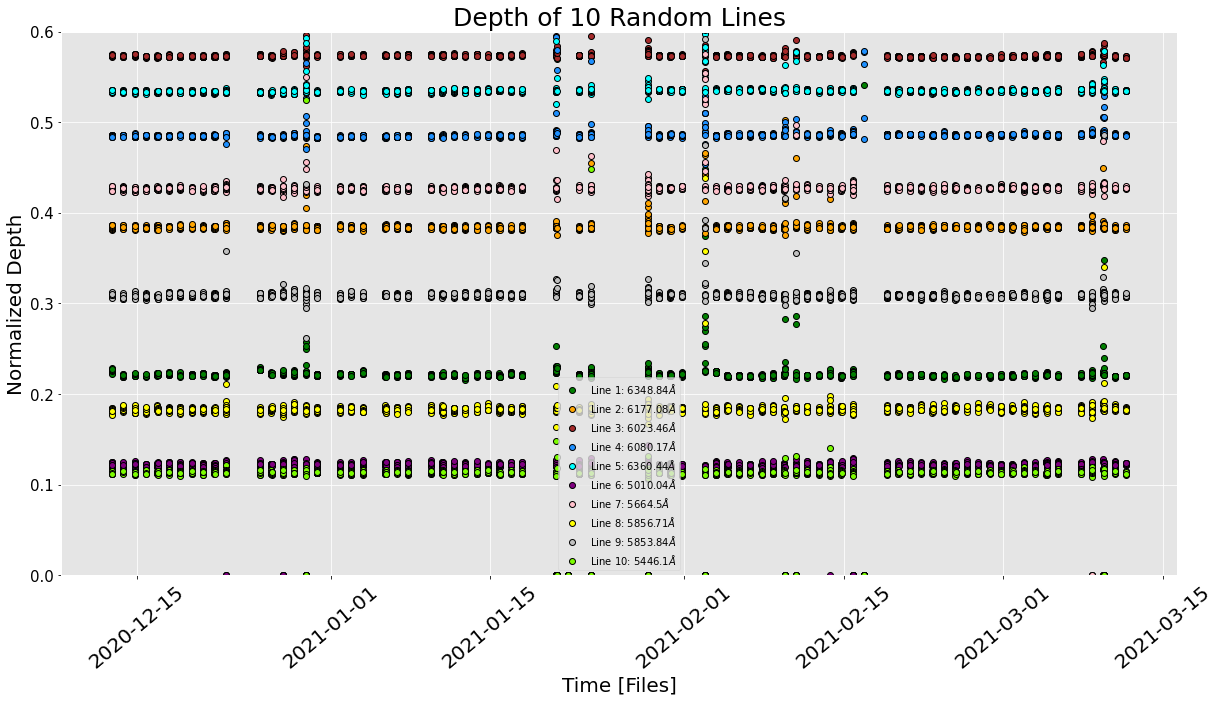

In [19]:
# Organize and Make Datetimes Readable
import datetime
formatted_dates = []
for datetime_value in np_datetimes:
    d = datetime.datetime.strptime(datetime_value, '%Y%m%dT%H%M%S')
    formatted_dates.append(d)
dates = mdates.date2num(formatted_dates)

# Prepare Lists of Depths
dl_1depths = list(zip(*dl_1))[0]
dl_2depths = list(zip(*dl_2))[0]
dl_3depths = list(zip(*dl_3))[0]
dl_4depths = list(zip(*dl_4))[0]
dl_5depths = list(zip(*dl_5))[0]
dl_6depths = list(zip(*dl_6))[0]
dl_7depths = list(zip(*dl_7))[0]
dl_8depths = list(zip(*dl_8))[0]
dl_9depths = list(zip(*dl_9))[0]
dl_10depths = list(zip(*dl_10))[0]

# Plot the Depths over Time
plt.figure(figsize=(20,10))
plt.plot_date(dates, dl_1depths, color='green', markeredgewidth=1,markeredgecolor='0', label='Line 1: '+str(round(dl_1[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_2depths, color='orange', markeredgewidth=1,markeredgecolor='0', label='Line 2: '+str(round(dl_2[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_3depths, color='brown', markeredgewidth=1,markeredgecolor='0', label='Line 3: '+str(round(dl_3[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_4depths, color='dodgerblue', markeredgewidth=1,markeredgecolor='0', label='Line 4: '+str(round(dl_4[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_5depths, color='aqua', markeredgewidth=1,markeredgecolor='0', label='Line 5: '+str(round(dl_5[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_6depths, color='purple', markeredgewidth=1,markeredgecolor='0', label='Line 6: '+str(round(dl_6[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_7depths, color='pink', markeredgewidth=1,markeredgecolor='0', label='Line 7: '+str(round(dl_7[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_8depths, color='yellow', markeredgewidth=1,markeredgecolor='0', label='Line 8: '+str(round(dl_8[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_9depths, color='silver', markeredgewidth=1,markeredgecolor='0', label='Line 9: '+str(round(dl_9[1][1], 2))+'$\AA$')
plt.plot_date(dates, dl_10depths, color='lawngreen', markeredgewidth=1,markeredgecolor='0', label='Line 10: '+str(round(dl_10[1][1], 2))+'$\AA$')
plt.title('Depth of 10 Random Lines', fontsize=25)
plt.xlabel('Time [Files]', fontsize=20)
plt.ylabel('Normalized Depth', fontsize=20)
plt.ylim([0, 0.60])
plt.xticks(fontsize=20, rotation=40)
plt.yticks(fontsize=15)
plt.legend()

In [124]:
# Create Tuple List values for 3D Plot
cube_list = []
for datetime in datetimes:
    for order in noon_cube['Time '+str(datetime)]:
        for line in noon_cube['Time '+str(datetime)][str(order)]:
            depth = noon_cube['Time '+str(datetime)][str(order)][str(line)]['amplitude']
            if depth>=1:
                continue
            centroid = noon_cube['Time '+str(datetime)][str(order)][str(line)]['centroid']

            cube_list.append((depth, centroid, datetime))

KeyError: 'Time 20201228T195340'

In [ ]:
# Prepare values for Plotting
cube_list_depths = list(zip(*cube_list))[0]
cube_list_centroids = list(zip(*cube_list))[1]
cube_list_datetimes = list(zip(*cube_list))[2]

# Organize and Make Datetimes Readable
import datetime
corrected_times = []
for cube_time in cube_list_datetimes:
    d = datetime.datetime.strptime(cube_time, '%Y%m%dT%H%M%S')
    corrected_times.append(d)
cube_dates = mdates.date2num(corrected_times)

# Pandas Dataframe for Clustering
cube_data = np.stack((cube_list_centroids, cube_list_depths, cube_dates), axis=1)
df = pd.DataFrame(cube_data)

In [ ]:
# Sklearn K-Means Clustering w/ 11 Groups
kmeans = cluster.KMeans(n_clusters=11, init='k-means++')
kmeans = kmeans.fit(df[[0, 1, 2]])
df['Clusters'] = kmeans.labels_


# Plot the Results
fig = plt.figure()
fig.set_size_inches(18, 18)
ax = fig.add_subplot(111, projection='3d')
x, y, z = df[0], df[1], df[2]

sns.set(style='darkgrid')
color_theme = np.array(['green', 'orange', 'brown', 'dodgerblue', 'aqua', 'purple', 'pink', 'yellow', 'silver', 'lawngreen', 'red'])

ax.scatter(z, x, y, 'o', edgecolors='b', c=color_theme[kmeans.labels_])
plt.xlabel('Time', fontsize=20)
plt.ylabel('Wavelength [Angstroms]', fontsize=20)
ax.set_zlabel('Normalized Depth', fontsize=20)
ax.ticklabel_format(useOffset=False)
plt.show()

In [ ]:
# For each Line (DEPTH)
depth_dict = {}
for datetime in datetimes:
    
    for order in noon_cube['Time '+str(datetime)]:
        for line in noon_cube['Time '+str(datetime)][str(order)]:
            depth_list = []
            
            for datetime2 in datetimes:
                depth = noon_cube['Time '+str(datetime2)][str(order)][str(line)]['amplitude']
                depth_list.append(depth)

            # Loop through all other lines in File
            depth_dict[cent] = {}
            for order in noon_cube['Time '+str(datetime)]:
                for line in noon_cube['Time '+str(datetime)][str(order)]:
                    nest_depth = [noon_cube['Time '+str(datetime)][str(order)][str(line)]['amplitude']]

                    corr = pearsonr(depth, nest_depth)

                    depth_dict[cent][str(nest_cent)] = corr

# TEMP
corr_data = numpy.loadtxt(fname='depth_corr.csv', delimiter=',')
image = plt.imshow(corr_data)
matplotlib.pyplot.show()

In [ ]:
start_time = time.time()

orders = list(range(40,111))
depth_list = []
for order in orders:
    m_order = order
    for line in noon_cube['Time 20210509T195226']['Order '+str(order)]:
        m_line = line
        depths = []
        for datetime in datetimes:
            try:
                depth = noon_cube['Time '+datetime]['Order '+str(order)][line]['amplitude']
            except KeyError:
                depth = 0
            depths.append(depth) 
          
        corr_list = []
        for n_order in orders:
            for n_line in noon_cube['Time 20210509T195226']['Order '+str(n_order)]:
                nest_depths = []
                for n_datetime in datetimes:
                    try:
                        nest_depth = noon_cube['Time '+n_datetime]['Order '+str(n_order)][n_line]['amplitude']
                    except KeyError:
                        nest_depth = 0
                    nest_depths.append(nest_depth) 
                
                try:
                    corr, p_value = pearsonr(depths, nest_depths)
                except ValueError:
                    corr = 0
                    
                if isclose(corr, 1, abs_tol=10**-4):
                    print(m_order, m_line, ' and ', n_order, n_line,': ',corr)
                corr_list.append(corr)
        
        with open('depth_corr.csv','a', newline='') as fd:
            writer_object = writer(fd)
            writer_object.writerow(corr_list)  
            fd.close()

print('Completed in ',(time.time() - start_time),' seconds')

40 Line 0  and  40 Line 0 :  1.0
40 Line 1  and  40 Line 1 :  0.9999999999999999
40 Line 2  and  40 Line 2 :  0.9999999999999999
40 Line 3  and  40 Line 3 :  0.9999999999999999
40 Line 4  and  40 Line 4 :  1.0
40 Line 5  and  40 Line 5 :  0.9999999999999999
40 Line 6  and  40 Line 6 :  1.0
40 Line 7  and  40 Line 7 :  0.9999999999999999
40 Line 8  and  40 Line 8 :  1.0
40 Line 9  and  40 Line 9 :  1.0
40 Line 10  and  40 Line 10 :  0.9999999999999999
40 Line 11  and  40 Line 11 :  0.9999999999999999
40 Line 12  and  40 Line 12 :  0.9999999999999998
40 Line 13  and  40 Line 13 :  1.0
40 Line 14  and  40 Line 14 :  1.0
40 Line 15  and  40 Line 15 :  0.9999999999999997
40 Line 16  and  40 Line 16 :  1.0
40 Line 17  and  40 Line 17 :  0.9999999999999998
40 Line 18  and  40 Line 18 :  1.0
40 Line 19  and  40 Line 19 :  1.0
40 Line 20  and  40 Line 20 :  1.0
40 Line 21  and  40 Line 21 :  1.0
40 Line 22  and  40 Line 22 :  1.0
40 Line 23  and  40 Line 23 :  0.9999999999999999
40 Line 24  and

In [5]:
with open("depth_corr.csv", "w") as my_empty_csv:
  # now you have an empty file already
  pass  # or write something to it already

In [6]:
# Find the Degree of Curvature of the Depths for all the Lines over Time
# -1 < a < 1 -> Flat Line
orders = list(range(40,111))
std_data = []
for order in orders:
    for line in noon_cube['Time 20210509T195226']['Order '+str(order)]:
        reference_centroid = noon_cube['Time 20210509T195226']['Order '+str(order)][line]['centroid']
        
        depth_trend = []
        for datetime in datetimes:
            try:
                depth = noon_cube['Time '+datetime]['Order '+str(order)][line]['amplitude']
            except KeyError:
                depth = 0
            depth_trend.append((depth, reference_centroid)) 
            
        depth_trend_DEPTHS = list(zip(*depth_trend))[0]
        
        std = np.std(depth_trend_DEPTHS)
        std_data.append((std, reference_centroid))

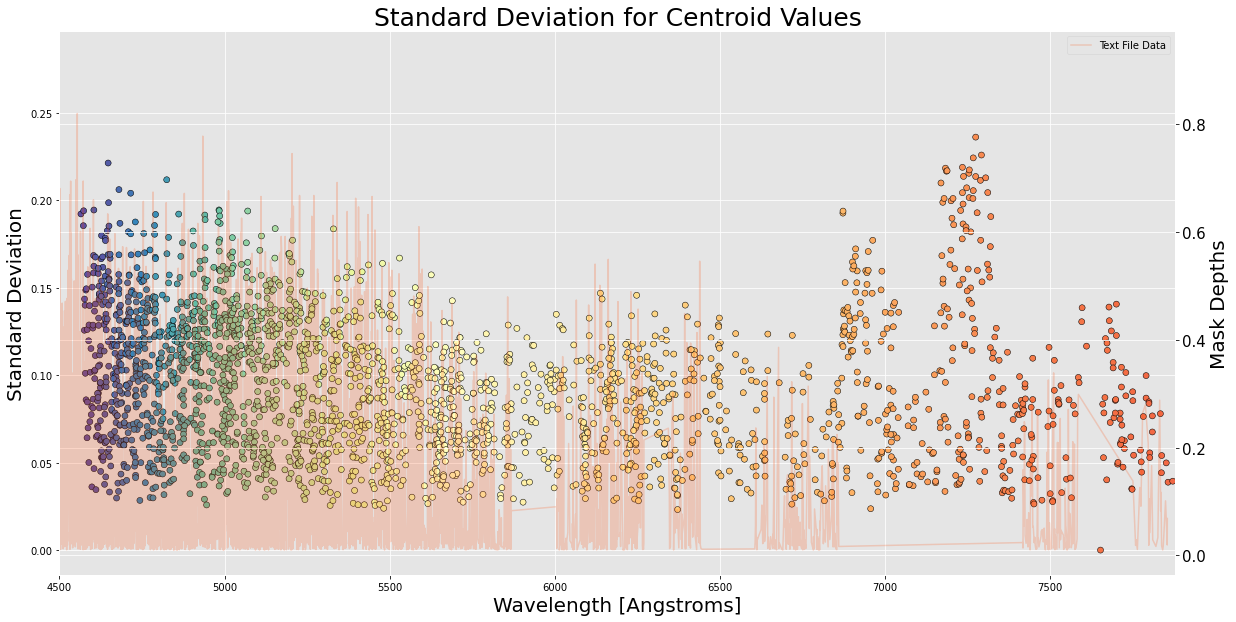

In [8]:
# Prepare values for Plotting
reference_centroids = list(zip(*std_data))[1]
std_values = list(zip(*std_data))[0]

# Grabbing Text File Data
pre_centroids = np.array([x.split(' ')[0] for x in open("G2_espresso.txt").readlines()])
pre_depths = list(np.array([x.split(' ')[1] for x in open("G2_espresso.txt").readlines()]))
pre_depths = [item.replace("\n", "") for item in pre_depths] 

# Prepare Text Values for Plotting
txt_centroids = []
txt_depths = []
for x in pre_centroids:
    txt_centroids.append(float(x))
for x in pre_depths:
    txt_depths.append(float(x))

# Plot Overlapped Results 
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()
cm, z = plt.cm.get_cmap('Spectral_r'), range(np.shape(reference_centroids)[0])
ax1.scatter(reference_centroids, std_values, c=z, cmap=cm, edgecolors='black')
ax2.plot(txt_centroids, txt_depths, '-', color='orangered', alpha=0.2, label='Text File Data')
#plt.axvspan(5870, 6000, alpha=0.5, label='Telluric Contaminated Area')
#plt.axvspan(6270, 6340, alpha=0.5)
#plt.axvspan(6450, 6610, alpha=0.5)
#plt.axvspan(6860, 7410, alpha=0.5)
#plt.axvspan(7590, 7750, alpha=0.5)
#plt.axvspan(7850, 9900, alpha=0.5)
plt.title('Standard Deviation for Centroid Values', fontsize=25)
ax1.set_xlabel('Wavelength [Angstroms]', fontsize=20)
ax1.set_ylabel('Standard Deviation', fontsize=20)
ax2.set_ylabel('Mask Depths', fontsize=20)
plt.xticks(fontsize=20, rotation=40)
plt.xlim((4500, 7880))
plt.yticks(fontsize=15)
plt.legend()

In [20]:
def test_func(x, a, b):
    return a * np.sin(b * x)
params, params_covariance = optimize.curve_fit(test_func, dates, depth_trend_DEPTHS,p0=[2, 2])

In [ ]:
# Find the Degree of Curvature of the Depths for all the Lines over Time
# -1 < a < 1 -> Flat Line
orders = list(range(40,111))
sin_data = []
for order in orders:
    for line in noon_cube['Time 20210509T195226']['Order '+str(order)]:
        reference_centroid = noon_cube['Time 20210509T195226']['Order '+str(order)][line]['centroid']
        
        depth_trend = []
        for datetime in datetimes:
            try:
                depth = noon_cube['Time '+datetime]['Order '+str(order)][line]['amplitude']
            except KeyError:
                depth = 0
            depth_trend.append((depth, reference_centroid)) 
            
        depth_trend_DEPTHS = list(zip(*depth_trend))[0]
        
        sin = np.std(depth_trend_DEPTHS)
        sin = fit_sin(tt, yynoise)
        sin_data.append((std, reference_centroid))